In [2]:
# Ćwiczenie 2
# Celem ćwiczenia jest samodzielne wykorzystanie wiedzy na temat wczytywania i przetwarzania bazy danych w języku Python.


# Mając do dyspozycji bazę danych dotyczącą raka piersi:

# Zwizualizuj znormalizowane dane w postaci wykresu 3D
# Wybierz trzy cechy, które pozwalają na rozróżnienie od siebie przynajmniej dwóch klas
# Użyj funkcji plot_surface do narysowania płaszczyny pozwalającej na rozróżnienie dwóch klas (klasy nie muszą być idealnie oddzielone)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [4]:
dir(dataset) # dir zwraca listę atrybutów danego obiektu

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
X_dataset, y_dataset = dataset.data, dataset.target
print(X_dataset.shape, y_dataset.shape)
print(X_dataset[0], y_dataset[0])
print(dataset.target_names)
print(dataset.feature_names)
print(len(dataset.feature_names))

(569, 30) (569,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30


In [6]:
dataset_norm = (X_dataset - np.min(X_dataset, axis=0)) / (np.max(X_dataset, axis=0) - np.min(X_dataset, axis=0))

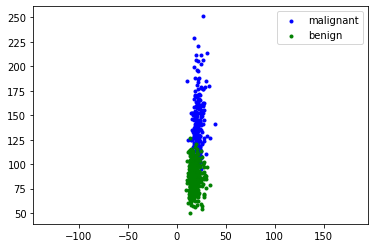

In [7]:
# PLOTTING BEFORE NORMALIZATION
plt.figure()
featurex=1
featurey=22
plt.scatter(X_dataset[y_dataset==0,featurex],X_dataset[y_dataset==0,featurey], c='b', marker='.', label=dataset.target_names[0])
plt.scatter(X_dataset[y_dataset==1,featurex],X_dataset[y_dataset==1,featurey], c='g', marker='.', label=dataset.target_names[1])
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

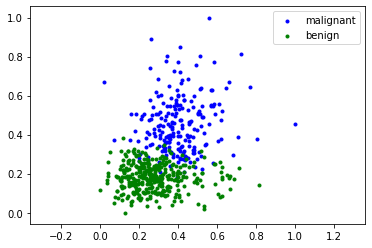

In [8]:
# PLOTTING AFTER NORMALIZATION
plt.figure()
featurex=1
featurey=22
plt.scatter(dataset_norm[y_dataset==0,featurex],dataset_norm[y_dataset==0,featurey], c='b', marker='.', label=dataset.target_names[0])
plt.scatter(dataset_norm[y_dataset==1,featurex],dataset_norm[y_dataset==1,featurey], c='g', marker='.', label=dataset.target_names[1])
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [9]:
#%matplotlib inline
%matplotlib qt5

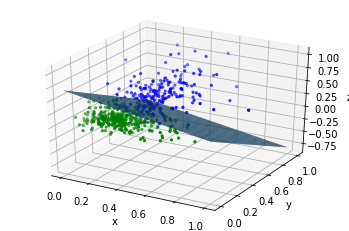

In [16]:
featurex=1
featurey=22
featurez=7

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(dataset_norm[y_dataset==0,featurex],dataset_norm[y_dataset==0,featurey], dataset_norm[y_dataset==0,featurez], c='b', marker='.', label=dataset.target_names[0])
ax.scatter(dataset_norm[y_dataset==1,featurex],dataset_norm[y_dataset==1,featurey], dataset_norm[y_dataset==1,featurez], c='g', marker='.', label=dataset.target_names[1])

ax.set_xlabel(dataset.feature_names[featurex])
ax.set_ylabel(dataset.feature_names[featurey])
ax.set_zlabel(dataset.feature_names[featurez])

x, y = np.meshgrid(np.arange(0, 1.01, 0.01), np.arange(0, 1.01, 0.01))
z = (2.1 - (1.3 * x) - (3.2 * y)) / 3
ax.plot_surface(x,y,z)
ax.set(xlabel='x', ylabel='y', zlabel='z')

plt.show()

In [11]:
# Ćwiczenie 3
# Celem ćwiczenia jest:

# Wyświetlanie macierzy jako obrazu;
# Zapoznanie z formatem csv;
# Przećwiczenie składni Pythona podczas implementacji algorytmu wczytywania bazy danych do macierzy.

In [12]:
from imageio import imread
file_path = r".\GTSRB\Training\00000\00000_00000.ppm"

img = imread(file_path)
img.shape

%matplotlib inline
#%matplotlib qt5

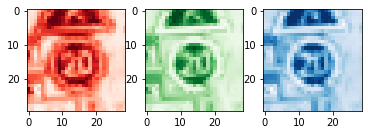

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(img[:,:,0],cmap='Reds')
ax2.imshow(img[:,:,1],cmap='Greens')
ax3.imshow(img[:,:,2],cmap='Blues')
plt.show()

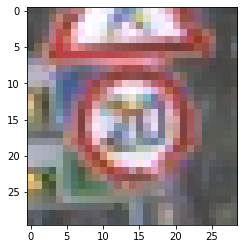

In [14]:
plt.figure()
plt.imshow(img)
plt.show()

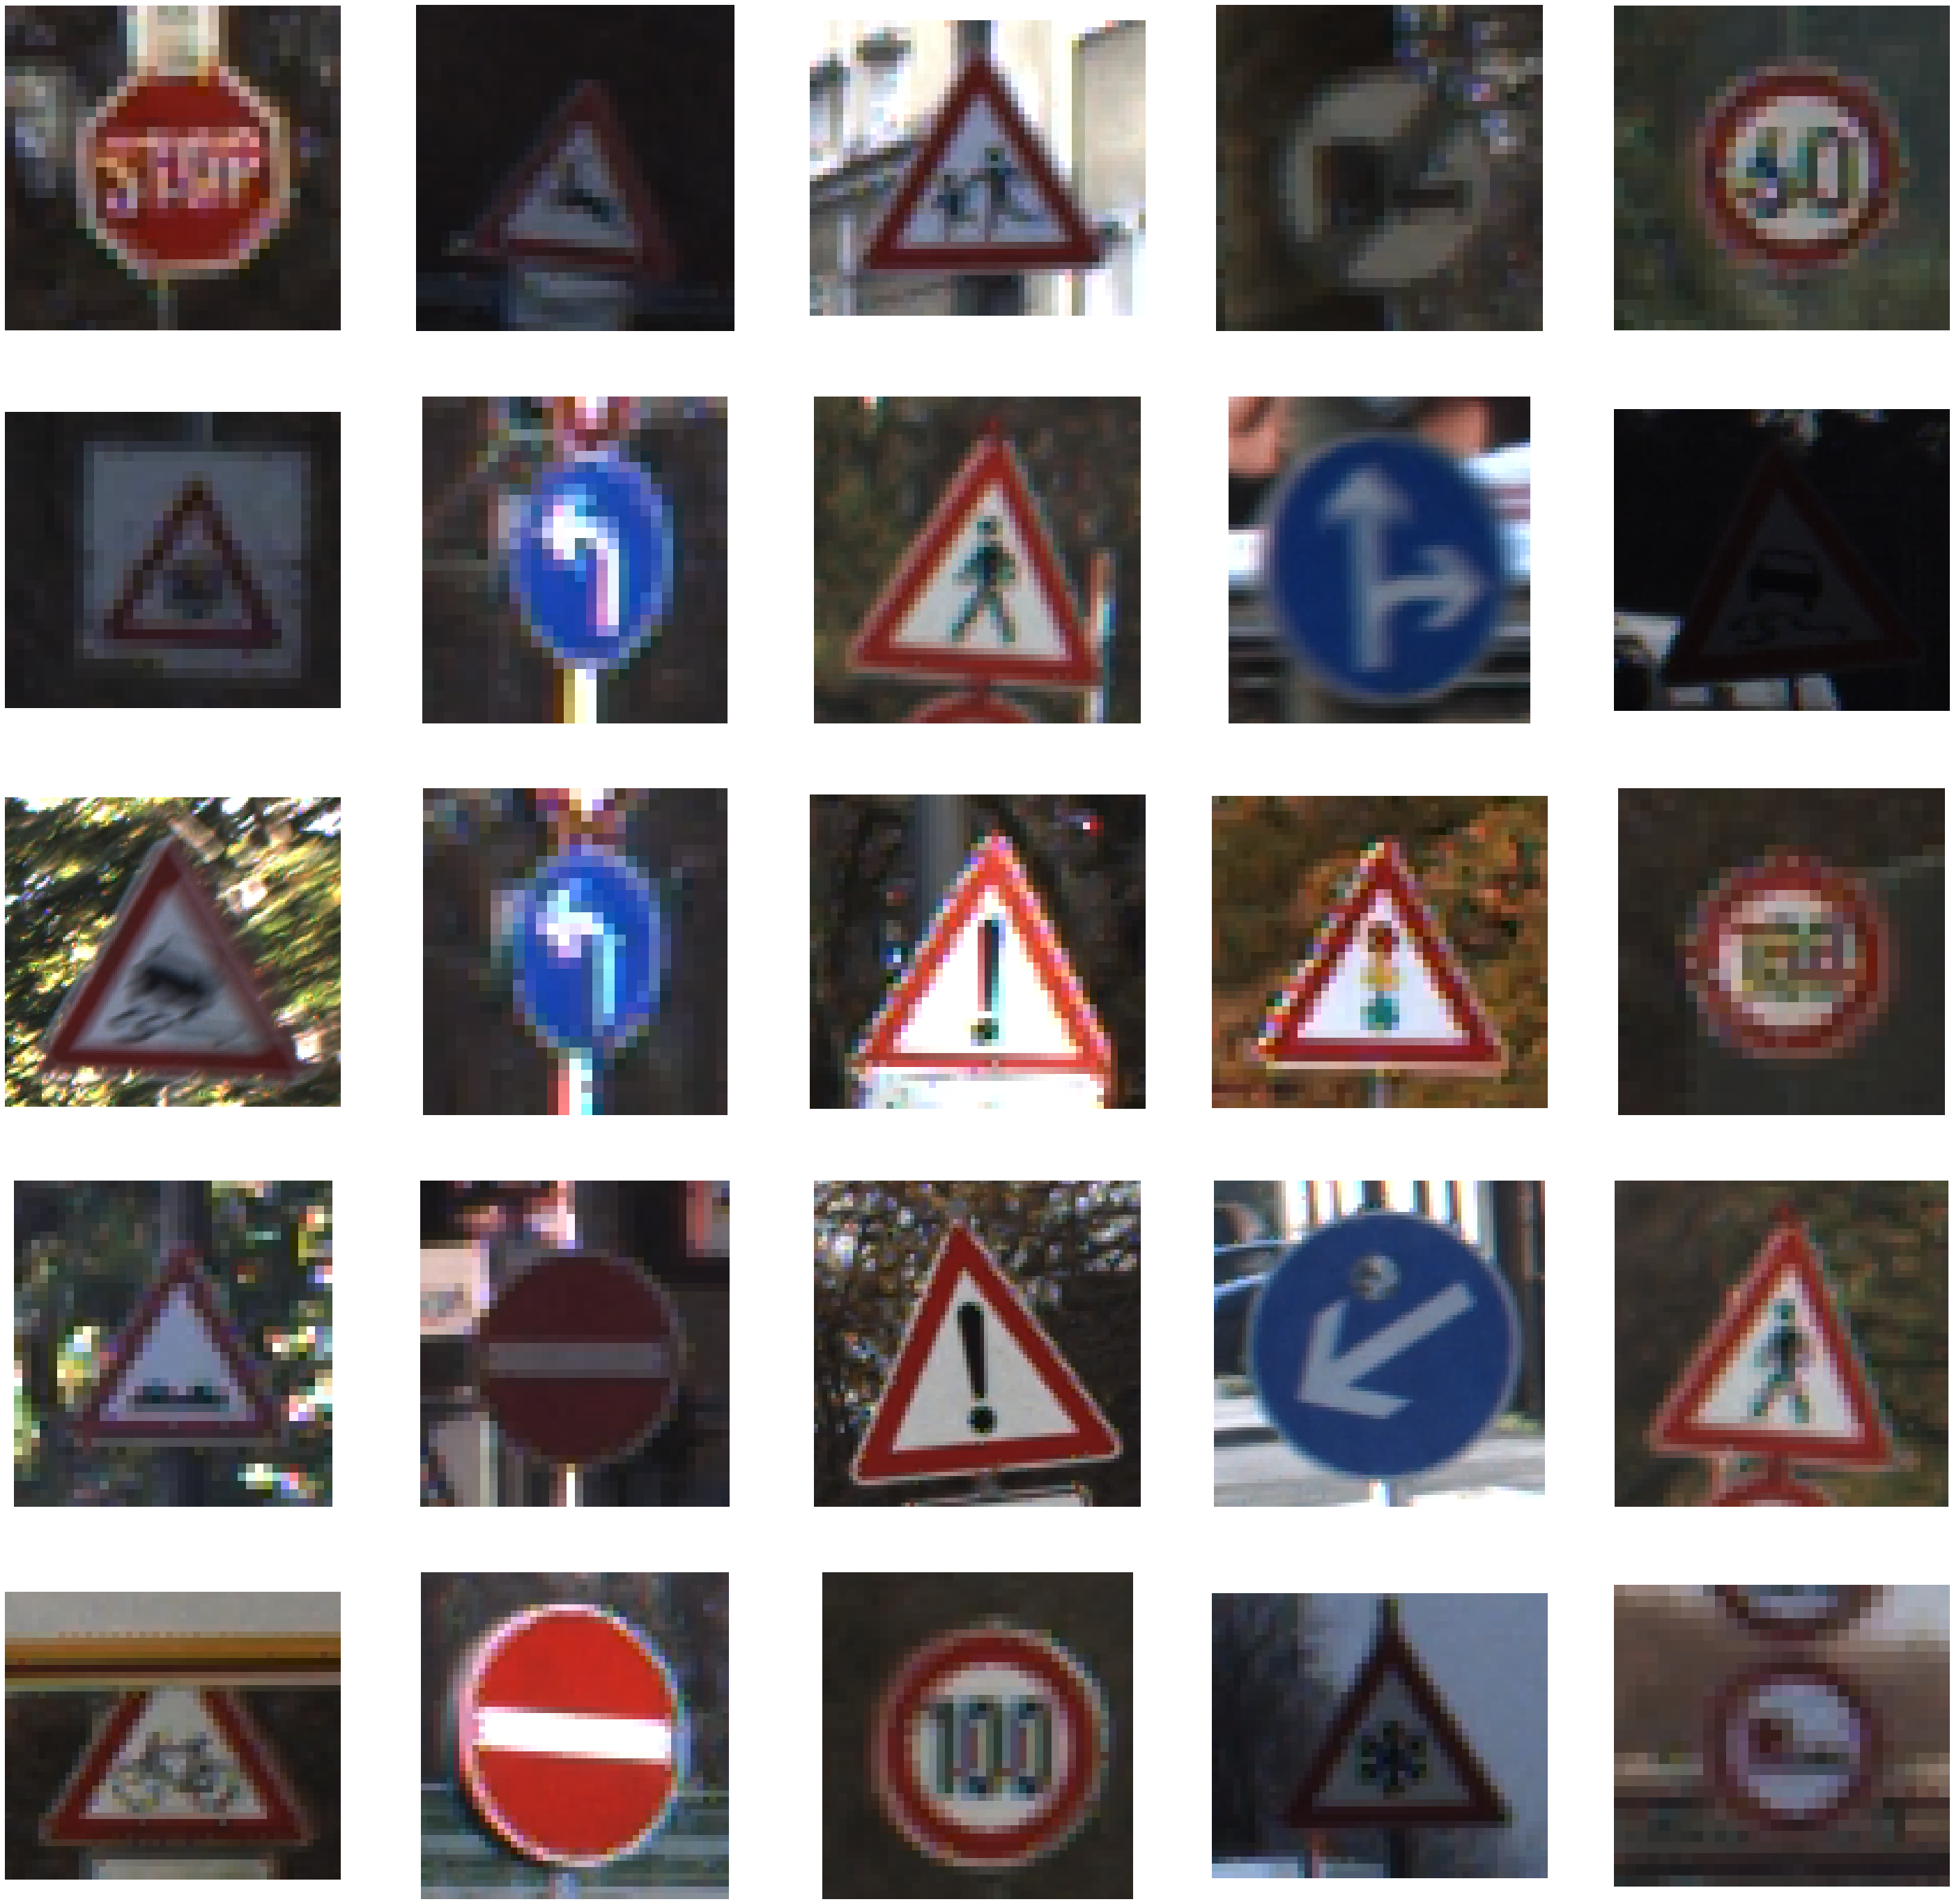

In [15]:
import os, random

# Wymiary dla figure i rozmieszczenia na niej subplotów
columns = 5
rows = 5

fig=plt.figure(figsize=(50,50))
main_path = r".\GTSRB\Training"

# Aby algorytm generowania ścieżki poprawnie działał, zakładam, 
# że w folderze Training występują tylko foldery ze zdjęciami.
# Jeśli w folderze ze zdjeciami nie ma zadnego pliku o rozszerzeniu
# .ppm to wyskoczy błąd "Cannot choose from an empty sequence",
# ponieważ nie uda się znaleźć żadnego poprawnego pliku
def generate_rand_path():
    rand_dir = random.choice(os.listdir(main_path))
    tmp_path = main_path + "\\" + rand_dir
    rand_path = tmp_path + '\\' + random.choice([x for x in os.listdir(tmp_path) if os.path.isfile(os.path.join(tmp_path, x)) and (os.path.join(tmp_path, x).lower().endswith(('.ppm')))])
    return rand_path

for i in range(1, columns*rows +1):
    img = imread(generate_rand_path())
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis("off")
plt.show()